In [1]:
import pandas as pd
import numpy as np
import blinksear as ear
import blinksdistance as distance
import blinkscolors as colors
import json
import matplotlib.pyplot as plt
from pathlib import Path

from blinksear import isBlinkByEar
from blinksdistance import BlinkDistance
from blinkscolors import Colors
from blinkscorrelation import Correlation

In [2]:
def generate_webgazer_dataframe(df):
    df_webgazer = df[~df["webgazer_data"].isna()]
    dfs = []
    for row in range(len(df_webgazer)):
        data_list = json.loads(df_webgazer["webgazer_data"].iloc[row])
        df_tmp = pd.DataFrame(data_list)
        df_tmp["trial"] = row + 1
        dfs.append(df_tmp)
    return pd.concat(dfs)

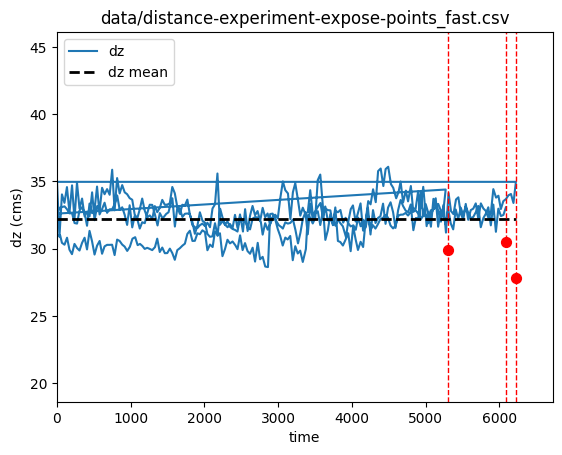

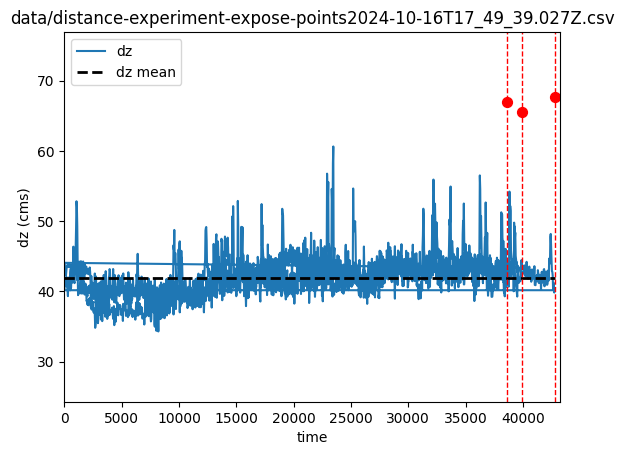

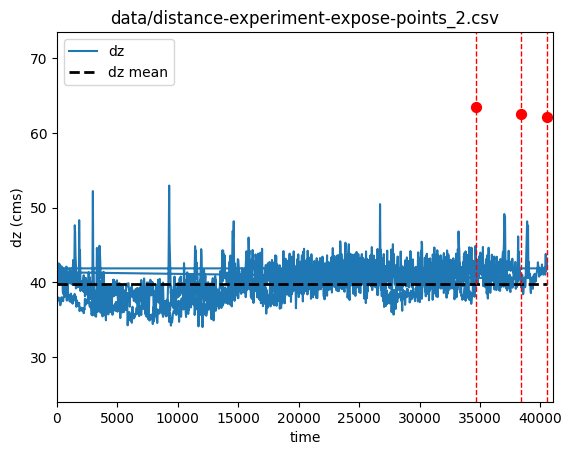

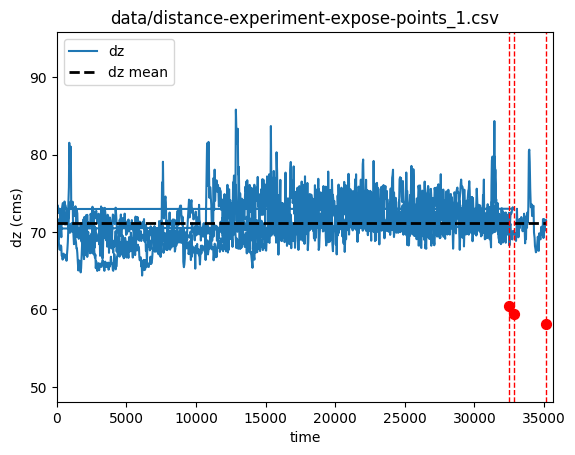

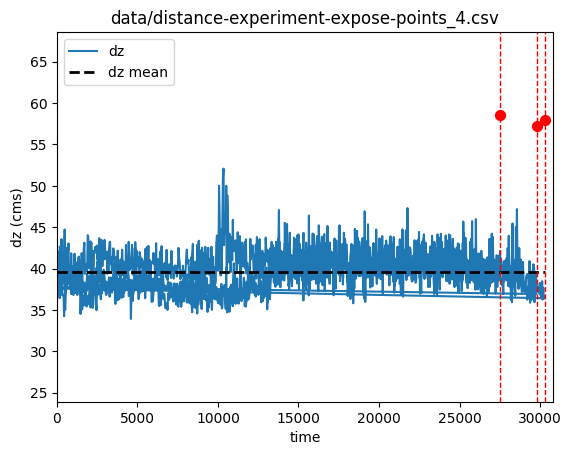

In [3]:
files = Path("./data").glob("*.csv")

for file in files:
    if "distance" in str(file):
        df = pd.read_csv(file)
        df_webgazer = generate_webgazer_dataframe(df)

        df_virtual_chin = df[~df["view_dist_mm"].isna()]
        df_virtual_chin.loc[:, ["view_dist_centimeters"]] = (
            df[~df["view_dist_mm"].isna()]["view_dist_mm"] / 10
        )
        (
            df_virtual_chin["rt"].reset_index(drop=True),
            df_webgazer.groupby("trial")["t"].max(),
        )

        df_webgazer = df_webgazer.astype({"dz": float, "t": float})
        df_webgazer.plot(x="t", y="dz")
        plt.xlabel("time")
        plt.ylabel("dz (cms)")
        plt.xlim(0, df_webgazer["t"].max() + 500)
        plt.hlines(
            df_webgazer["dz"].mean(),
            df_webgazer["t"].min(),
            df_webgazer["t"].max(),
            color="k",
            linestyle="--",
            lw=2,
            label="dz mean",
        )
        for virtual_chin_time, virtual_chin_distance in zip(
            df_virtual_chin["rt"], df_virtual_chin["view_dist_centimeters"]
        ):
            plt.axvline(virtual_chin_time, color="red", linestyle="--", lw=1)
            plt.scatter(virtual_chin_time, virtual_chin_distance, s=50, color="red")
            plt.ylim(
                min(df_webgazer["dz"].min(), virtual_chin_distance) - 10,
                max(virtual_chin_distance, df_webgazer["dz"].max()) + 10,
            )

        plt.title(file)
        plt.legend(loc="upper left")
        plt.show()


In [4]:
# This can load all data but is not storing df_webgazer in any place
files = Path("./data").glob("*.csv")
for file in files:
    if "blink" in str(file):
        print(file)
        df = pd.read_csv(file)
        df_webgazer = generate_webgazer_dataframe(df)

data/blink-experiment-expose-points_4.csv
data/blink-experiment-expose-points_1.csv
data/blink-experiment-expose-points_2.csv
data/blink-experiment-expose-points_3.csv


In [5]:
blinkDistance = distance.BlinkDistance()
blinkColors = Colors()
blinkCorrelations = Correlation()


df_webgazer["isBlinkByEar"] = df_webgazer["importantKeypoints"].map(
    lambda x: isBlinkByEar(
        x["rightEyeTopArc"],
        x["rightEyeBottomArc"],
        x["leftEyeTopArc"],
        x["leftEyeBottomArc"],
    )
)
df_webgazer["isBlinkByDistance"] = df_webgazer["importantKeypoints"].map(
    lambda x: blinkDistance.isBlinkByDistance(
        x["rightEyeTopArc"],
        x["rightEyeBottomArc"],
        x["leftEyeTopArc"],
        x["leftEyeBottomArc"],
    )
)
df_webgazer["isBlinkColors"] = df_webgazer.apply(
    lambda row: blinkColors.isBlinkByColors(
        list(row["leftEye"]["data"].values()), list(row["rightEye"]["data"].values())
    ),
    axis=1,
)


df_webgazer["isBlinkByCorrelation"] = df_webgazer.apply(
    lambda row: blinkCorrelations.isBlinkByCorrelation(
        list(row["leftEye"]["data"].values()), list(row["rightEye"]["data"].values())
    ),
    axis=1,
)


# df_webgazer['isBlinkByEar'] = df_webgazer['importantKeypoints'].map(lambda x: isBlinkByEar(x['rightEyeTopArc'], x['rightEyeBottomArc'], x['leftEyeTopArc'], x['leftEyeBottomArc']))

df_webgazer

,x,y,t,importantKeypoints,leftEye,rightEye,dz,trial,isBlinkByEar,isBlinkByDistance,isBlinkColors,isBlinkByCorrelation
0,0,0,59,"{'noseX': 310.62, 'noseY': 301.01, 'topY': 172...","{'data': {'0': 19, '1': 24, '2': 0, '3': 255, ...","{'data': {'0': 130, '1': 88, '2': 54, '3': 255...",46.87,1,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
1,0,0,75,"{'noseX': 310.7, 'noseY': 299.96, 'topY': 172....","{'data': {'0': 130, '1': 79, '2': 29, '3': 255...","{'data': {'0': 116, '1': 73, '2': 33, '3': 255...",46.51,1,"[False, False, False, False, False, False, True]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
2,0,0,111,"{'noseX': 309.65, 'noseY': 299.04, 'topY': 171...","{'data': {'0': 107, '1': 57, '2': 8, '3': 255,...","{'data': {'0': 101, '1': 56, '2': 12, '3': 255...",45.82,1,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
3,0,0,141,"{'noseX': 311.36, 'noseY': 301.27, 'topY': 172...","{'data': {'0': 108, '1': 55, '2': 5, '3': 255,...","{'data': {'0': 125, '1': 83, '2': 43, '3': 255...",45.94,1,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
4,0,0,183,"{'noseX': 309.78, 'noseY': 300.32, 'topY': 172...","{'data': {'0': 108, '1': 55, '2': 5, '3': 255,...","{'data': {'0': 106, '1': 60, '2': 16, '3': 255...",46.65,1,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
...,...,...,...,...,...,...,...,...,...,...,...,...
937,0,0,31865,"{'noseX': 301.11, 'noseY': 295.27, 'topY': 168...","{'data': {'0': 92, '1': 39, '2': 0, '3': 255, ...","{'data': {'0': 96, '1': 60, '2': 23, '3': 255,...",48.22,4,"[False, False, False, False, False, False, True]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
938,0,0,31897,"{'noseX': 300.62, 'noseY': 295.96, 'topY': 168...","{'data': {'0': 92, '1': 39, '2': 0, '3': 255, ...","{'data': {'0': 96, '1': 57, '2': 18, '3': 255,...",49.36,4,"[False, False, False, False, False, False, True]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
939,0,0,31935,"{'noseX': 301.28, 'noseY': 295.35, 'topY': 168...","{'data': {'0': 93, '1': 42, '2': 1, '3': 255, ...","{'data': {'0': 102, '1': 67, '2': 29, '3': 255...",50.03,4,"[False, False, False, False, False, False, True]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"
940,0,0,31967,"{'noseX': 301.43, 'noseY': 295.75, 'topY': 168...","{'data': {'0': 83, '1': 33, '2': 0, '3': 255, ...","{'data': {'0': 101, '1': 66, '2': 28, '3': 255...",48.48,4,"[False, False, False, False, False, False, True]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]"


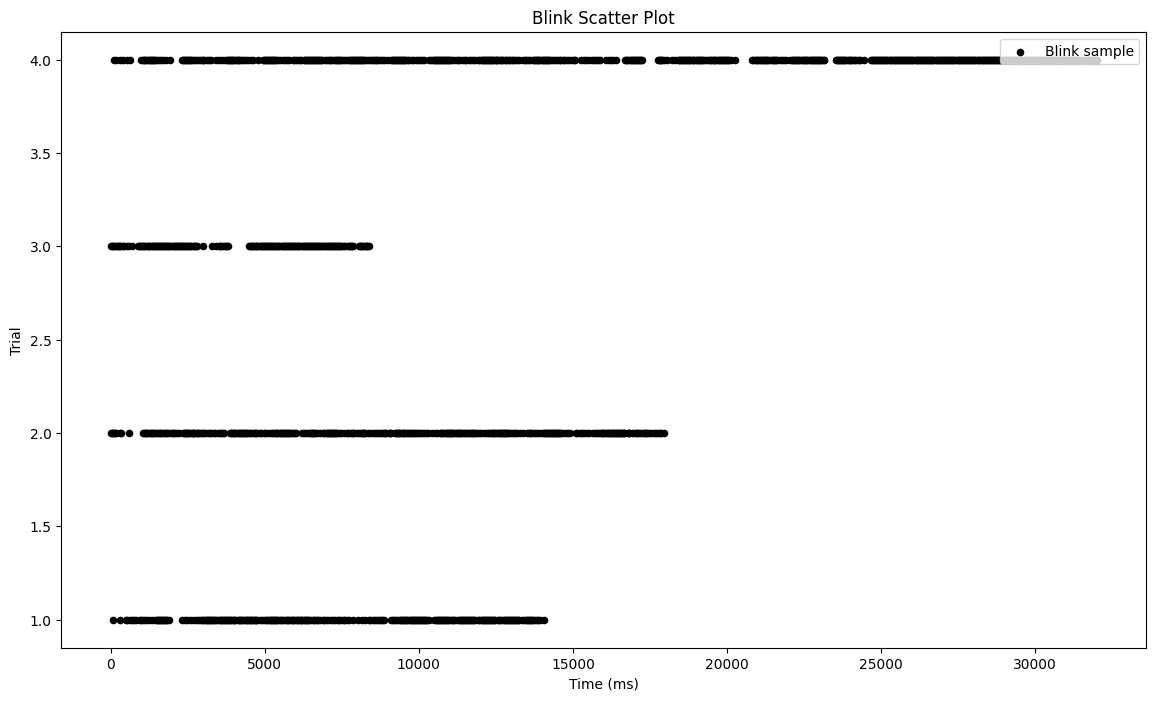

In [6]:
# Define the conditions for the different blink types
df_webgazer['Blink_sample'] = df_webgazer['isBlinkByEar'].apply(lambda x: any(x))

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plot the blink data using different colors for each type
plt.scatter(df_webgazer[df_webgazer['Blink_sample']].t, df_webgazer[df_webgazer['Blink_sample']].trial, color='black', label='Blink sample', s=20)

# Add labels and legend
plt.title('Blink Scatter Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Trial')
plt.legend(loc='upper right')

# Show plot
plt.show()


<Axes: xlabel='t', ylabel='isBlinkByEar'>

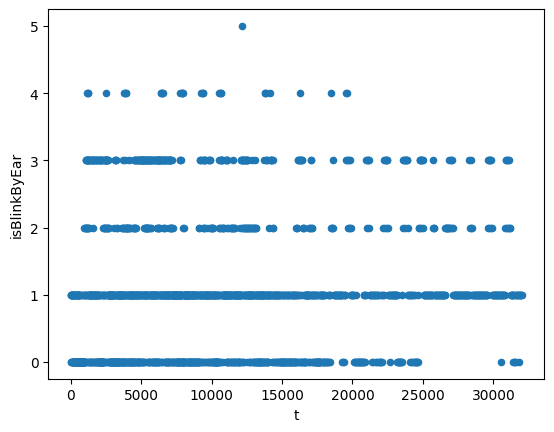

In [7]:
df_webgazer["isBlinkByEar"] = df_webgazer["isBlinkByEar"].map(
    lambda x: sum([int(i) for i in x])
)
df_webgazer[["t", "isBlinkByEar"]].plot.scatter(x="t", y="isBlinkByEar")

In [8]:
row = 0
d = {}
df_list_tmp = []

for i, trial in enumerate(df_webgazer["trial"].unique()):
    df_list_tmp.append(df_webgazer.query(f"trial == {trial}"))
    if i > 1:
        d[f"row_{row}"] = pd.concat(df_list_tmp)
        row = row + 1
        i = 0
        df_list_tmp = []

In [9]:
max_rows = 45
for i in range(20):
    if f"row_{i}" not in d:
        d[f"row_{i}"] = pd.DataFrame()  # Create an empty DataFrame for missing rows
    n_rows = d[f"row_{i}"].shape[0]
    if n_rows < max_rows:
        n_to_add = max_rows - n_rows

        # Pad data to ensure a consistent length
        for _ in range(n_to_add):
            data = {
                "x": [np.nan],
                "y": [np.nan],
                "t": [np.nan],
                "b": [False],
                "sample": [np.nan],
                "trial": [np.nan],
                "trial_type": [""],
            }
            new_row = pd.DataFrame(data)
            d[f"row_{i}"] = pd.concat([d[f"row_{i}"], new_row], ignore_index=True)


In [11]:
# # Set up the figure
# fig, ax = plt.subplots(figsize=(10, 6))

# # Define colors for trial types
# color_map = {"red": "red", "green": "green"}

# # Iterate through each row (trial)
# for row in range(20):
#     df_row = d[f"row_{row}"]
#     df_row["b"] = df_row["b"].astype(int)

#     # Find the index where 't' is 0
#     zero_index = np.where(df_row["t"] == 0)[0]

#     # Check if there is more than one zero index
#     if len(zero_index) > 1:
#         # Shift 't' values for the second part of the trial
#         df_row["t"].iloc[zero_index[1] :] += df_row["t"].iloc[zero_index[1] - 1]

#     # Plot points based on "b" with black color, y-axis representing the "trial" column
#     ax.scatter(
#         df_row[df_row["b"] == 1]["t"],
#         df_row[df_row["b"] == 1]["trial"],
#         c="black",
#         s=40,
#         alpha=0.8,
#         label="Blinks",
#     )
#     ax.scatter(
#         df_row[(df_row["b"] == 0) & (df_row["t"] > 1000)]["t"],
#         df_row[(df_row["b"] == 0) & (df_row["t"] > 1000)]["trial"],
#         c="green",
#         s=30,
#         alpha=0.2,
#         label="No blink during red",
#     )
#     ax.scatter(
#         df_row[(df_row["b"] == 0) & (df_row["t"] <= 1000)]["t"],
#         df_row[(df_row["b"] == 0) & (df_row["t"] <= 1000)]["trial"],
#         c="red",
#         s=30,
#         alpha=0.2,
#         label="No blink during green",
#     )

# # Set labels and title
# ax.set_xlabel("time (ms)")
# ax.set_ylabel("Trial")

# ax.invert_yaxis()  # Invert the Y-axis